In [61]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from PIL import Image
import os


In [62]:
with open('bag1.jpg','rb') as file:
    # Image함수호출
    img = Image.open(file)
    # 흑백변경 - RGB
    img = img.convert('L')
    # 사이즈 변경
    img = img.resize((28,28))
    # 숫자배열로 변경
    source_data = np.array(img)

In [63]:
# 데이터불러오기
(train_data,train_label),(test_data,test_label) = keras.datasets.fashion_mnist.load_data()

print(train_data[:5])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [92]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [64]:
train_data.shape

(60000, 28, 28)

In [65]:
# 3차원 데이터 변환
train_scaled = train_data.reshape(-1,28,28,1)
train_scaled.shape

(60000, 28, 28, 1)

In [66]:
test_scaled = test_data.reshape(-1,28,28,1)
test_scaled.shape

(10000, 28, 28, 1)

In [67]:
# 예측 이미지
source_scaled = source_data.reshape(-1,28,28,1)
source_scaled.shape

(1, 28, 28, 1)

In [68]:
train_scaled = train_scaled/255
test_scaled = test_scaled/255
source_scaled = source_scaled/255

In [69]:
# classes = ['티셔츠','바지','스웨터','드레스','코트',
#            '샌달','셔츠','스니커즈','가방','앵클 부츠']

In [70]:
np.where(train_label==8)

(array([   23,    35,    57, ..., 59962, 59967, 59994], dtype=int64),)

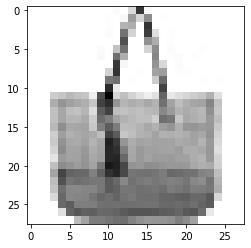

In [71]:
plt.imshow(train_scaled[35].reshape(28, 28), cmap='gray_r')
plt.show()

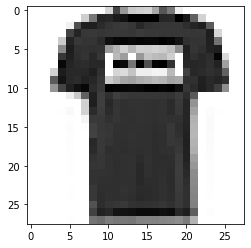

In [72]:
plt.imshow(train_scaled[1].reshape(28, 28), cmap='gray_r')
plt.show()

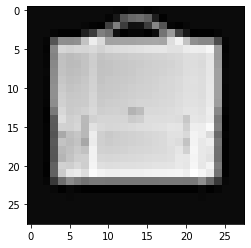

In [73]:
plt.imshow(source_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [74]:
sub_data,val_data,sub_label,val_label = train_test_split(train_scaled,train_label)
sub_data.shape,val_data.shape

((45000, 28, 28, 1), (15000, 28, 28, 1))

In [75]:
# 합성곱 신경망 선언
model = keras.Sequential()

# CNN
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
# 최대풀링
model.add(keras.layers.MaxPooling2D(2))

# CNN - 1회 반복
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
# 최대풀링
model.add(keras.layers.MaxPooling2D(2))



In [76]:
# 인공신경망의 선언
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [77]:
# from tensorflow.keras.utils import plot_model
# keras.utils.plot_model(model)

In [78]:
# 순환 신경망 설정 adam
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [79]:
# 콜백 - 20번돌고, 가장 낮은 손실률을 저장
check_cb = keras.callbacks.ModelCheckpoint('cnn-test.h5',save_best_only=True)
early_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

In [80]:
history = model.fit(sub_data,sub_label,epochs=15,batch_size=64,\
    validation_data=(val_data,val_label),callbacks=[check_cb,early_cb])

Epoch 1/15
704/704 [==============================] - 17s 23ms/step - loss: 0.9208 - accuracy: 0.6813 - val_loss: 0.5401 - val_accuracy: 0.8057
Epoch 2/15
704/704 [==============================] - 16s 23ms/step - loss: 0.5631 - accuracy: 0.7996 - val_loss: 0.4698 - val_accuracy: 0.8320
Epoch 3/15
704/704 [==============================] - 16s 23ms/step - loss: 0.4896 - accuracy: 0.8267 - val_loss: 0.4173 - val_accuracy: 0.8523
Epoch 4/15
704/704 [==============================] - 16s 23ms/step - loss: 0.4468 - accuracy: 0.8421 - val_loss: 0.3866 - val_accuracy: 0.8632
Epoch 5/15
704/704 [==============================] - 17s 23ms/step - loss: 0.4195 - accuracy: 0.8526 - val_loss: 0.3642 - val_accuracy: 0.8677
Epoch 6/15
704/704 [==============================] - 16s 23ms/step - loss: 0.3964 - accuracy: 0.8616 - val_loss: 0.3640 - val_accuracy: 0.8683
Epoch 7/15
704/704 [==============================] - 16s 23ms/step - loss: 0.3819 - accuracy: 0.8662 - val_loss: 0.3604 - val_accuracy:

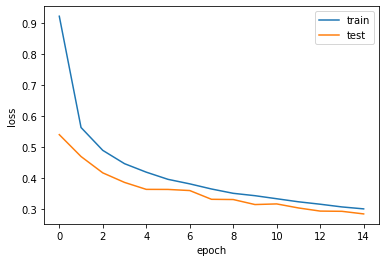

In [81]:
# 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [82]:
# 정확도
score = model.evaluate(val_data,val_label)
print("loss, accuracy : ",score)

469/469 [==============================] - 2s 3ms/step - loss: 0.2853 - accuracy: 0.8949
loss, accuracy :  [0.28526976704597473, 0.8948666453361511]


In [83]:
# test_data 예측
results = model.predict(val_data[0:1])
print(results)

1/1 [==============================] - 0s 73ms/step
[[6.22662075e-04 5.02638932e-06 9.77689505e-01 1.93880885e-04
  6.22616662e-03 4.93380730e-06 1.52310915e-02 1.31180798e-07
  2.65692943e-05 1.09144928e-07]]


In [84]:
classes = ['티셔츠','바지','스웨터','드레스','코트',
           '샌달','셔츠','스니커즈','가방','앵클 부츠']

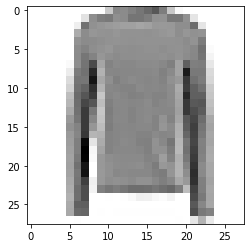

In [85]:
plt.imshow(val_data[0:1].reshape(28, 28), cmap='gray_r')
plt.show()

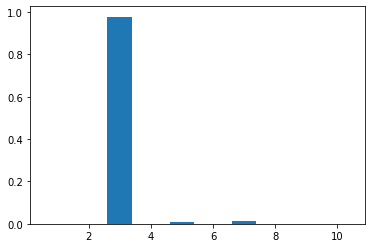

In [86]:
plt.bar(range(1,11),results[0])
plt.show()

In [87]:
classes[np.argmax(results)]

'스웨터'

In [91]:
# source 예측
source_results = model.predict(source_scaled)
print(source_results)

1/1 [==============================] - 0s 13ms/step
[[2.29436363e-08 9.25740127e-12 1.15847547e-10 5.21797432e-11
  5.14362099e-13 1.22612346e-11 8.27509172e-09 5.63506837e-12
  1.00000000e+00 3.05634895e-09]]


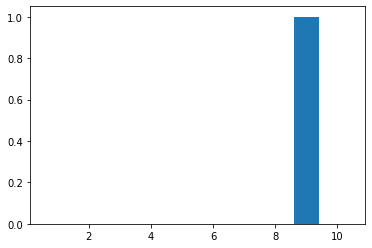

In [89]:
plt.bar(range(1,11),source_results[0])
plt.show()

In [90]:
# source_data 예측 값
classes[np.argmax(source_results[0])]

'가방'